<a href="https://colab.research.google.com/github/ZahrizhalAli/BitCoin_TimeSeries_with_TensorFlow_Experiments/blob/main/10_time_series_forecasting_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict

**Note** This is not financial advice

Bitcoin prediction based on the historical data

##  Get Data

we're going to be using historical price of data of bitcointo try and predict the future price of bitcoin. We downloaded the data from here : https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-09-08 02:43:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2022-09-08 02:43:30 (63.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series data

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
#Lets read in our bitcoin data and parse the dates
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 
                 parse_dates=['Date'],
                 index_col=['Date']) #  parse the date column and tell pandas column 1 is a datetime

In [3]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
# How many samples do we have
len(df)

2787

In [5]:
#only wantt closing price for each day
bitcoin_prices =  pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})

In [6]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


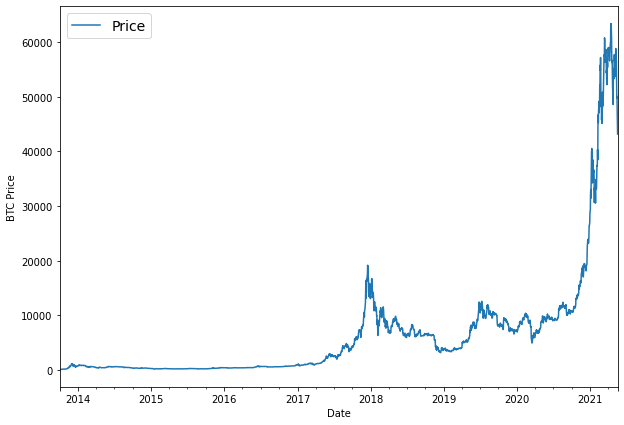

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.legend(fontsize=14)

## Importing time series with Python's CSV module

In [8]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',') #format from csv
  next(csv_reader) #skips  the first line a.k.a the labels / headers
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the second labels a.k.a Date from csv
    btc_price.append(float(line[2])) # get closing price 

In [9]:
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

## Create train and test sets of our time series data (the wrong way)

In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(timesteps, 
                                                    prices, 
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

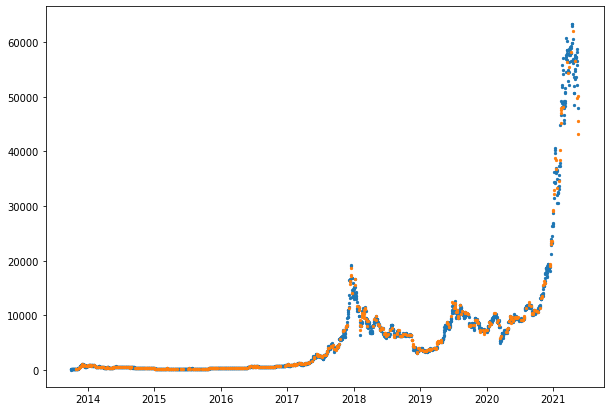

In [12]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.show()

## Create train and test split for time series (the right way)

In [13]:
# Creat train and test splits the right way tfor time series data
split_size = int(0.8 * len(prices)) # 80% train,

# create train data splits
X_train , y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]


len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

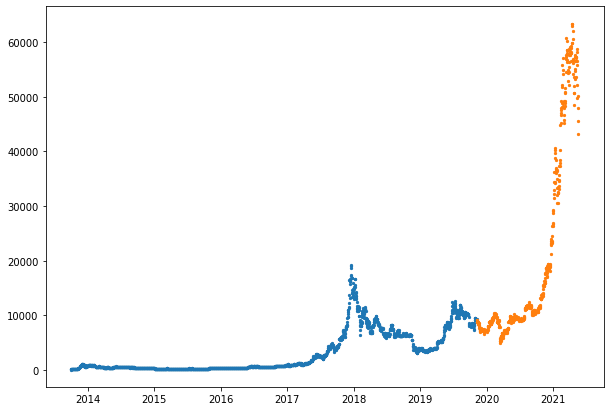

In [14]:
# Let's plot the right train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.show()

## Creating a plotting function

In [15]:


# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)



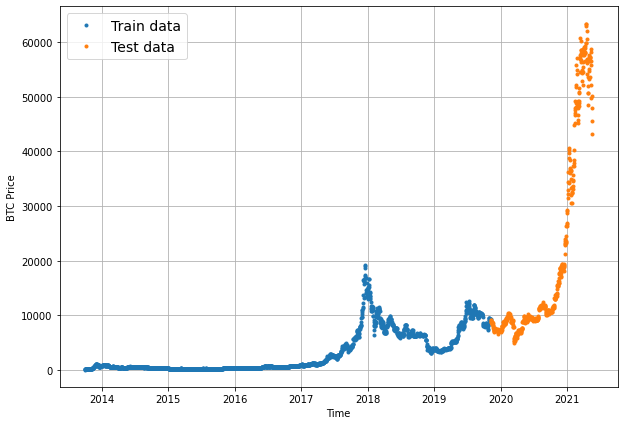

In [16]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

We've got some bitcoin historical data, to model it let's run a series of modelling experiments to see which model performs best.

**Experiments**

* 0 Naive model
* 1 Dense model
* 2 Same as model 1
* 3 Same as model 1
* 4 Conv1D
* 5 LSTM (RNN)
* 6 Same as model 1 (but with multivariate data)
* 7 N-BEATS algorithm
* 8 Ensemble (multiple models stacked together)
* 9 Future prediction model
* 10 Same as model 1 (but with different data)

## Model 0 : Naive model forecasts (baseline)

$$\hat{y}_{t} = y_{t-1}$$

In English:
> The prediction at timestep t (y_hat) is equal to the value at timestep t-1 (previous timestep) - this is for horizon of 1

In [17]:
# Create a naive forecase
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

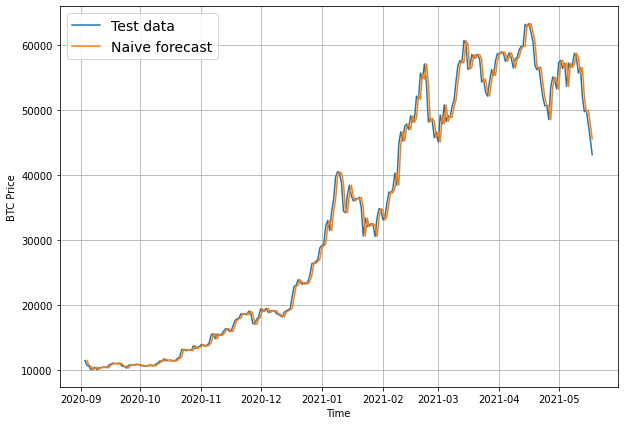

In [18]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, start= 300, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=300, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=300, format="-", label="Naive forecast");

## Evaluating a time series model

Some evaluation metrics for time series forecasting

What are we doing?

We're predicting a number means we have a form of a regression problem.

Because we're working on a regression.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - Mean Absolute Error (on average prediction is this much different from this much true value)
* MSE - Mean Squared Error
* Huber - Combination of MSE and MAE. Less sensitive to outliers
* Mean Absolute Percentage Error - sMAPE (Symmetric Mean Absolute Percentage Error)
* Mean Absolute Scaled Error - (<1) if forecasts performs better than naive forecast **Note** : There are seasonal and non-seasonal

**Note** For all of the above metrics, **lower is better**


The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true) or ground truth values**

### MASE Implementation

**Source** : https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.performance_metrics.forecasting.MeanAbsoluteScaledError.html

**2nd Source** : https://stackoverflow.com/questions/63485535/implementation-of-mean-absolute-scaled-error-in-tensorflow-python

In [19]:
# MASE Implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data: i.e. Bitcoin marketplace is not seasonality)

  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1). i.e bitcoin is 1 per day

  return mae / mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy() #y_test[1:] is based on what we index in line 18

0.9995699939182624

## Function for all evaluation metrics 

In [21]:
def evaluate_preds(y_true, y_pred):
  """
  Return evaluation metrics in dictionary form of (MAE, MSE, sMAPE, and MASE)
  
  Make sure float32 datatype (for metric calculation)
  """
  # Turning datatype to float32
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)


  # MAE
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)

  # MSE
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)

  # RMSE
  rmse = tf.sqrt(mse)

  # sMAPE (MAPE and sMAPE is different)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred) 

  # MASE
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {'MAE': mae.numpy(),
          'MSE': mse.numpy(),
          'RMSE': rmse.numpy(),
          'MAPE': mape.numpy(),
          'MASE': mase.numpy()} # convert to numpy so that it does not return as a tensor -> will create an error

In [22]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'MAPE': 2.516525,
 'MASE': 0.99957}

In [23]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [24]:
# On average there are 567 difference to the real value
naive_results['MAE']

567.9802

In [25]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [26]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other models you can use for baselines and for actual forecasts

In this notebook, we're focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series model below:

**Source** : 

Model/Library Name 	Resource
* Moving average 	https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
* ARIMA (Autoregression Integrated Moving Average) 	https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
* sktime (Scikit-Learn for time series) 	https://github.com/alan-turing-institute/sktime
* TensorFlow Decision Forests (random forest, gradient boosting trees) 	https://www.tensorflow.org/decision_forests
* Facebook Kats (purpose-built forecasting and time series analysis library by Facebook) 	https://github.com/facebookresearch/Kats
* LinkedIn Greykite (flexible, intuitive and fast forecasts) 	https://github.com/linkedin/greykite

## Format data part 2 : Windowing our dataset


Why do we window?

we window our time series to turn our datasets into a supervised learning problem.

```
Windowing for one week
features -> labels
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
```


In [27]:
# What we want to do with our bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [28]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [29]:
# Create function to label windowed data
def get_labeled_windows(x, horizon):
  """
  creates labels for windowed datasets
  e.g. 
  """
  return x[:, :-horizon], x[:, -horizon:]

In [30]:
# Test out the window labelling function
test_window, test_label = get_labeled_windows(tf.expand_dims(tf.range(8) + 1, axis=0), 1)
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [31]:
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


We've got a way to label our windowed data.

However, this only works on small sscale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.
To speed things up, we'll leverage Numpy's array indexing

Our function will:
1. Create a window step of specific window size
2. Use NumPy indxing to create a 2D array of multiple window steps

**Source**  The function we're bout to create has been adapted to the following article: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [32]:
# Create a function to view NumPy arrays as windows
import numpy as np

def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window step of specific window size
  window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

  # 2. Use NumPy indexing to create a 2D array of multiple window
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon-1)), axis=0).T # create 2D array of windows 
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")
 
  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labeled windows
  windows, labels = get_labeled_windows(windowed_array, horizon=HORIZON)

  return windows, labels


In [33]:
# make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON) # tweak at the window indexes

In [34]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [35]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Horizon: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Horizon: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Horizon: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Horizon: [125.96116]


In [36]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Horizon: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Horizon: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Horizon: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Horizon: [43144.47129086]


**Note** There's a functio nwhich does similar to the above in `tf.keras.preprocessing`

**Source** https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

## Turning windows into training and test sets

In [37]:
# def Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  # test_size = int(test_split * (len(windows)))
  # split_size = len(windows) - test_size
  split_size = int((1 - test_split) * len(windows))
  X_train, y_train = windows[:split_size], labels[:split_size]
  X_test, y_test = windows[split_size:], labels[split_size:]

  return X_train, X_test, y_train, y_test
  

In [38]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [39]:
len(train_labels), len(test_windows)

(2224, 556)

In [40]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

## Make a Modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More spesificially, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

In [41]:
import os

# Create a function to implement a ModelCheckpoint callback with a spesific filename
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path , model_name),
                                            verbose=0,
                                            monitor='val_loss',
                                            save_best_only=True)

## Model 1 : Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimizer and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why these value?
I picked them out of experimentation.
* Hyperparameters = values a machine learning practitioner can adjust themselves.
* Parameter = Values a model learns on its own.

In [42]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for a reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear') # linear activation is the same as having no activation
], name='model_1_dense')

# 2. Compile
model_1.compile(loss='mae',
                optimizer='adam',
                metrics=['mae', 'mse'])
# 3. Fit the model
model_1.fit(train_windows, train_labels, epochs=100, verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])


Epoch 1/100
18/18 [==============================] - 5s 50ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 0s 27ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 0s 27ms/step - loss: 158.5

In [43]:
# Evaluate model on test data. the saved model will not always be the last epochs performance
# instead it is the model with best performing model
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [44]:
# Load best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

## Making forecats with a model (on test dataset)

To make 'forecasts' on the test dataset (note: these won't be actual forecasts, they're only pseudo forecast because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data(same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [45]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """

  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [46]:
# Make predictions using model_1 on the test dataset on view results
model_1_preds = make_preds(model_1, test_windows)
# len(model_1_preds), model_1_preds[:5]

In [47]:
# Evaluate preds
model_1_results = evaluate_preds(test_labels, model_1_preds)
model_1_results


{'MAE': array([11928.928 , 11795.89  , 11974.975 , 11948.294 , 11954.369 ,
        12005.417 , 12095.947 , 12114.574 , 12074.43  , 12274.317 ,
        12328.176 , 12355.669 , 12659.421 , 12910.016 , 12878.644 ,
        13093.804 , 12949.453 , 13008.312 , 12720.619 , 12814.96  ,
        12581.029 , 12707.598 , 12820.861 , 12856.263 , 12869.6875,
        12947.9375, 12808.818 , 12728.705 , 12714.618 , 12702.0625,
        12856.51  , 12927.327 , 12960.658 , 12967.021 , 12928.017 ,
        13054.391 , 13032.356 , 13233.18  , 13509.827 , 12790.818 ,
        13002.818 , 13009.271 , 12891.539 , 12929.483 , 12987.1045,
        12930.544 , 12948.6875, 12972.472 , 12937.094 , 12872.536 ,
        12818.355 , 12918.38  , 12975.586 , 12979.919 , 13169.246 ,
        12887.849 , 12853.178 , 12845.989 , 12591.282 , 12378.129 ,
        12360.25  , 12528.331 , 12347.686 , 12353.041 , 12309.105 ,
        12329.121 , 11962.126 , 11905.699 , 11974.919 , 11866.165 ,
        11859.347 , 12016.111 , 12007.854

In [48]:
test_labels.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [49]:
model_1_results = evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results, naive_results

({'MAE': 568.9511,
  'MSE': 1171743.8,
  'RMSE': 1082.4711,
  'MAPE': 2.5448983,
  'MASE': 0.99948955},
 {'MAE': 567.9802,
  'MSE': 1147547.0,
  'RMSE': 1071.2362,
  'MAPE': 2.516525,
  'MASE': 0.99957})

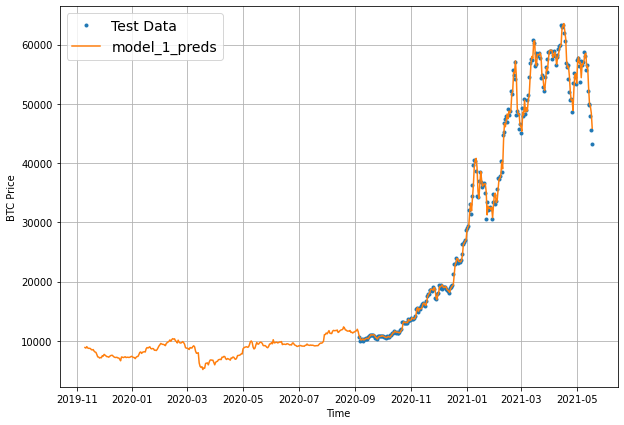

In [50]:
# Let's plot our model 1 prediction
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test window offset and index into test_labels to ensure corrent plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test Data')

# Plot prediction
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds,format='-',  label='model_1_preds')


**Note** this is because of autocorrelation data

## Model 2 : Dense (window=30, horizon=1)

In [51]:
HORIZON = 1
WINDOW_SIZE = 30

In [52]:
# Make windowed data with appropritate horizon and window size
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [53]:
len(full_windows), len(full_labels)

(2757, 2757)

In [54]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)

In [55]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [56]:
tf.random.set_seed(42)

# Create model 
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_2_dense')

# Compile
model_2.compile(loss='mae',
                optimizer='adam',
                metrics=['mae', 'mse'])

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])


In [57]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 659.3332 - mae: 659.3332 - mse: 1397247.7500


[659.3331909179688, 659.3331909179688, 1397247.75]

In [58]:
# Load the best model (ALWAYS DO THIS!!)
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.8741 - mae: 605.8741 - mse: 1273360.7500


[605.8740844726562, 605.8740844726562, 1273360.75]

In [59]:
# Get forecast prediction
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:3], test_windows[:3]

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([8882.84 , 8904.423, 8762.442], dtype=float32)>,
 array([[8337.81899854, 8162.44      , 8003.82039479, 8058.05808111,
         7970.2394756 , 7943.34710706, 8200.3187634 , 8200.24609949,
         8073.40954388, 7420.41583649, 7460.61741593, 8591.22389742,
         9171.30653186, 9578.36755607, 9458.22335963, 9455.72469261,
         9225.99547934, 9131.41063031, 9197.63234462, 9290.89660239,
         9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
         8711.53433917, 8760.89271814],
        [8162.44      , 8003.82039479, 8058.05808111, 7970.2394756 ,
         7943.34710706, 8200.3187634 , 8200.24609949, 8073.40954388,
         7420.41583649, 7460.61741593, 8591.22389742, 9171.30653186,
         9578.36755607, 9458.22335963, 9455.72469261, 9225.99547934,
         9131.41063031, 9197.63234462, 9290.89660239, 9202.41545055,
         9369.62808116, 9326.59

In [60]:
model_1_preds[:3], test_windows[:3]

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([8861.71 , 8769.887, 9015.711], dtype=float32)>,
 array([[8337.81899854, 8162.44      , 8003.82039479, 8058.05808111,
         7970.2394756 , 7943.34710706, 8200.3187634 , 8200.24609949,
         8073.40954388, 7420.41583649, 7460.61741593, 8591.22389742,
         9171.30653186, 9578.36755607, 9458.22335963, 9455.72469261,
         9225.99547934, 9131.41063031, 9197.63234462, 9290.89660239,
         9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
         8711.53433917, 8760.89271814],
        [8162.44      , 8003.82039479, 8058.05808111, 7970.2394756 ,
         7943.34710706, 8200.3187634 , 8200.24609949, 8073.40954388,
         7420.41583649, 7460.61741593, 8591.22389742, 9171.30653186,
         9578.36755607, 9458.22335963, 9455.72469261, 9225.99547934,
         9131.41063031, 9197.63234462, 9290.89660239, 9202.41545055,
         9369.62808116, 9326.59

In [61]:
# Evaluate results
model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'MAE': 605.8741,
 'MSE': 1273360.8,
 'RMSE': 1128.4329,
 'MAPE': 2.726445,
 'MASE': 1.0590738}

In [62]:
model_1_results

{'MAE': 568.9511,
 'MSE': 1171743.8,
 'RMSE': 1082.4711,
 'MAPE': 2.5448983,
 'MASE': 0.99948955}

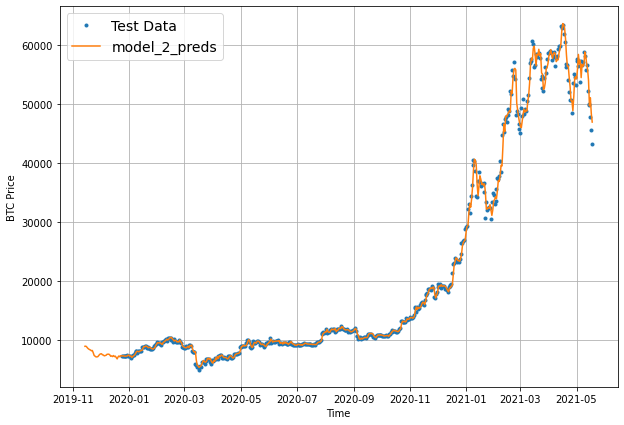

In [63]:
# Let's plot our model 1 prediction
offset = 40
plt.figure(figsize=(10, 7))
# Account for the test window offset and index into test_labels to ensure corrent plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test Data')

# Plot prediction
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds,format='-',  label='model_2_preds')


# Model 3: Dense (window=30, horizon=7)

In [64]:
HORIZON = 7
WINDOW_SIZE = 30

In [65]:
# Make windowed data with appropritate horizon and window size
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [66]:
len(full_windows) , len(full_labels)

(2751, 2751)

In [67]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)

In [68]:
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2200, 2200, 551, 551)

In [69]:
tf.random.set_seed(42)

# Create model 
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_3_dense')

# Compile
model_3.compile(loss='mae',
                optimizer='adam',
                metrics=['mae', 'mse'])

# Fit
model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])


In [70]:
# Evaluate our model
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1300.1522 - mae: 1300.1522 - mse: 5599956.0000


[1300.1522216796875, 1300.1522216796875, 5599956.0]

In [71]:
# Load the best model (ALWAYS DO THIS!!)
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense/')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5063 - mae: 1237.5063 - mse: 5405199.0000


[1237.50634765625, 1237.50634765625, 5405199.0]

In [72]:
model_3_preds = make_preds(model_3, test_windows)

In [73]:
model_3_preds[:3].numpy(), test_labels[:3]

(array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
         9357.3545],
        [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
         9156.818 ],
        [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
         9042.725 ]], dtype=float32),
 array([[8794.35864452, 8798.04205463, 9081.18687849, 8711.53433917,
         8760.89271814, 8749.52059102, 8656.97092235],
        [8798.04205463, 9081.18687849, 8711.53433917, 8760.89271814,
         8749.52059102, 8656.97092235, 8500.64355816],
        [9081.18687849, 8711.53433917, 8760.89271814, 8749.52059102,
         8656.97092235, 8500.64355816, 8469.2608989 ]]))

In [74]:
# Evaluate results
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'MAE': array([ 513.6056  ,  355.08328 ,  327.17075 ,  358.5106  ,  420.53293 ,
         537.854   ,  545.6617  ,  485.9228  ,  584.49713 ,  687.38214 ,
         836.2264  ,  755.1576  ,  731.4957  ,  775.3399  ,  567.95544 ,
         266.80865 ,  188.80217 ,  188.10805 ,  253.095   ,  301.43256 ,
         151.10721 ,  196.8148  ,  191.46178 ,  231.65031 ,  143.61125 ,
         122.59089 ,  132.78871 ,  190.81174 ,  179.15994 ,  228.26004 ,
         314.44022 ,  379.09235 ,  278.32526 ,  295.34702 ,  299.3852  ,
         248.64983 ,  299.75668 ,  259.69434 ,  180.30531 ,  206.72922 ,
         374.62863 ,  144.85086 ,  142.33635 ,  131.11613 ,   93.9412  ,
          54.825542,   73.79555 ,  103.60121 ,  121.333916,  168.67278 ,
         183.90945 ,  152.25307 ,  186.57199 ,  146.91273 ,  240.42912 ,
         351.00656 ,  540.952   ,  549.1573  ,  521.2411  ,  526.8554  ,
         453.36237 ,  257.9811  ,  277.2947  ,  301.8247  ,  455.718   ,
         458.9603  ,  503.4438  ,  522.3119 

## Make our evaluation function work for larger horizons

In [75]:
def evaluate_preds(y_true, y_pred):
  """
  Return evaluation metrics in dictionary form of (MAE, MSE, sMAPE, and MASE)
  
  Make sure float32 datatype (for metric calculation)
  """
  # Turning datatype to float32
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)


  # MAE
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)

  # MSE
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)

  # RMSE
  rmse = tf.sqrt(mse)

  # sMAPE (MAPE and sMAPE is different)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred) 

  # MASE
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {'MAE': mae.numpy(),
          'MSE': mse.numpy(),
          'RMSE': rmse.numpy(),
          'MAPE': mape.numpy(),
          'MASE': mase.numpy()} # convert to numpy so that it does not return as a tensor -> will create an error

In [76]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'MAE': 1237.5063,
 'MSE': 5405198.5,
 'RMSE': 1425.7477,
 'MAPE': 5.5588784,
 'MASE': 2.2020733}

In [77]:
model_1_results, model_2_results, model_3_results

({'MAE': 568.9511,
  'MSE': 1171743.8,
  'RMSE': 1082.4711,
  'MAPE': 2.5448983,
  'MASE': 0.99948955},
 {'MAE': 605.8741,
  'MSE': 1273360.8,
  'RMSE': 1128.4329,
  'MAPE': 2.726445,
  'MASE': 1.0590738},
 {'MAE': 1237.5063,
  'MSE': 5405198.5,
  'RMSE': 1425.7477,
  'MAPE': 5.5588784,
  'MASE': 2.2020733})

# Model 3 visualize

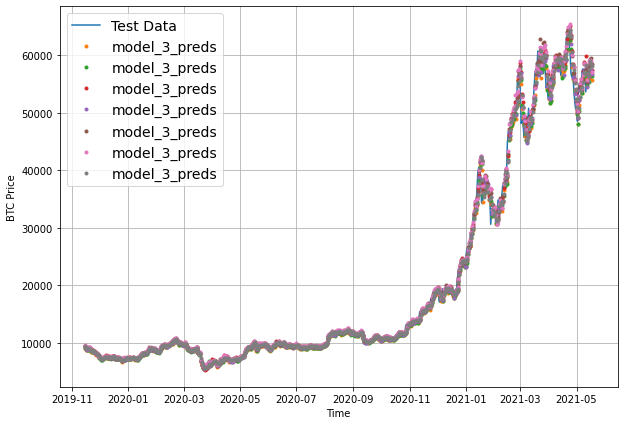

In [78]:
# Let's plot our model 1 prediction
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test window offset and index into test_labels to ensure corrent plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],format='-', start=offset, label='Test Data')

# Plot prediction
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds,  label='model_3_preds')


**Note** We need to reduce dimensionality using `tf.reduce_mean` to get only one mean value from 7 horizons

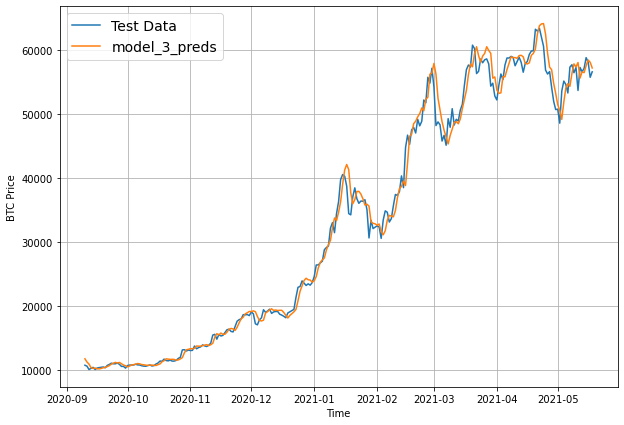

In [79]:
# Let's plot our model 1 prediction
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test window offset and index into test_labels to ensure corrent plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],start=offset,format='-', label='Test Data')

# Plot prediction
plot_time_series(timesteps=X_test[-len(test_windows):],  values=tf.reduce_mean(model_3_preds, axis=1), start=offset, format='-',  label='model_3_preds')


# Which of our models is performing the best so far?

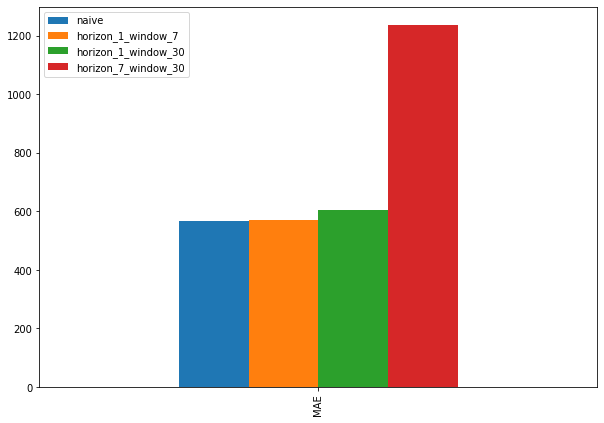

In [80]:
df_results = pd.DataFrame({'naive': naive_results['MAE'],
                           'horizon_1_window_7': model_1_results['MAE'],
                           'horizon_1_window_30': model_2_results['MAE'],
                           'horizon_7_window_30': model_3_results['MAE']}, index=['MAE']).plot(figsize=(10,7), kind='bar')

# Model 4 : Conv1D



In [81]:
HORIZON = 1 
WINDOW_SIZE = 7 

In [82]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [83]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)

In [84]:
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

We need an input shape of : `(batch_size, timesteps, input_dim)`

However our data isn't in that shape yet...

In [85]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, ) 

(7,)

In [86]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [87]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [88]:
#  Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}")

Original shape: (7,)
Expanded shape: (7, 1)


In [89]:
train_windows[0]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])

In [90]:
expand_dims_layer(x)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

In [91]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x : tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=7, strides=1, padding='causal', activation='relu'), # kernel size = window sliding 
  layers.Dense(1)
], name='model_4_conv1d')



In [92]:
# Compile the model
model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows, train_labels, batch_size=128, epochs=100, verbose=0, validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [93]:
# Summary
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 615.6102


615.6101684570312

In [95]:
model_4 = tf.keras.models.load_model('/content/model_experiments/model_4_conv1d')

In [96]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.7388


570.73876953125

In [97]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8893.429, 8788.89 , 9020.29 , 8796.402, 8743.089], dtype=float32)>

In [98]:
# Evaluate predictions
model_4_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_4_preds)
model_4_results

{'MAE': 570.7388,
 'MSE': 1183499.9,
 'RMSE': 1087.8878,
 'MAPE': 2.5461204,
 'MASE': 1.00263}

# Model 5 : LSTM

`inputs = layers.Input(shape=(WINDOW_SIZE))`
`x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)`
`x = layers.LSTM(128)(x)`
`output = layers.Dense(HORIZON)(x)`

`model_5 = tf.keras.Model(inputs=inputs, outputs=output, name='model_5_LSTM')`

In [99]:
tf.random.set_seed(42)

# Create LSTM model
model_5 = tf.keras.Sequential([
  layers.Lambda(lambda x : tf.expand_dims(x, axis=1)),
  # layers.LSTM(128, activation='tanh'),
  layers.LSTM(128, activation='relu'), # relu turns out better than the default 'tanh'
  layers.Dense(1)
], name='model_5_lstm')

# Using keras Functional API


# Compile the model
model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                )
# Fit the model
model_5.fit(train_windows, train_labels, epochs=100, verbose=1, validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
63/70 [==========================>...] - ETA: 0s - loss: 1000.7482

70/70 [==============================] - 4s 35ms/step - loss: 923.8335 - val_loss: 999.7739
Epoch 2/100
70/70 [==============================] - 0s 6ms/step - loss: 174.3591 - val_loss: 1059.5967
Epoch 3/100
60/70 [========================>.....] - ETA: 0s - loss: 170.7853

70/70 [==============================] - 2s 29ms/step - loss: 169.0976 - val_loss: 915.7005
Epoch 4/100
70/70 [==============================] - 0s 6ms/step - loss: 164.8597 - val_loss: 961.9780
Epoch 5/100
66/70 [===========================>..] - ETA: 0s - loss: 164.7822

70/70 [==============================] - 2s 28ms/step - loss: 162.1378 - val_loss: 881.1057
Epoch 6/100
70/70 [==============================] - 0s 6ms/step - loss: 154.4248 - val_loss: 1048.9911
Epoch 7/100
65/70 [==========================>...] - ETA: 0s - loss: 155.6785

70/70 [==============================] - 2s 33ms/step - loss: 151.9672 - val_loss: 817.6928
Epoch 8/100
62/70 [=========================>....] - ETA: 0s - loss: 147.1066

70/70 [==============================] - 2s 29ms/step - loss: 148.8312 - val_loss: 783.2538
Epoch 9/100
70/70 [==============================] - 0s 6ms/step - loss: 140.9373 - val_loss: 801.6102
Epoch 10/100
70/70 [==============================] - 0s 6ms/step - loss: 145.7707 - val_loss: 848.7509
Epoch 11/100
62/70 [=========================>....] - ETA: 0s - loss: 140.1361

70/70 [==============================] - 2s 28ms/step - loss: 138.0576 - val_loss: 777.6620
Epoch 12/100
66/70 [===========================>..] - ETA: 0s - loss: 135.6432

70/70 [==============================] - 2s 28ms/step - loss: 136.0284 - val_loss: 724.0181
Epoch 13/100
70/70 [==============================] - 0s 6ms/step - loss: 131.3890 - val_loss: 955.6802
Epoch 14/100
70/70 [==============================] - 0s 6ms/step - loss: 133.7509 - val_loss: 789.2650
Epoch 15/100
62/70 [=========================>....] - ETA: 0s - loss: 130.2543

70/70 [==============================] - 2s 33ms/step - loss: 128.5206 - val_loss: 684.2516
Epoch 16/100
64/70 [==========================>...] - ETA: 0s - loss: 124.5350

70/70 [==============================] - 2s 28ms/step - loss: 126.0890 - val_loss: 670.2017
Epoch 17/100
70/70 [==============================] - 0s 6ms/step - loss: 123.1890 - val_loss: 734.0786
Epoch 18/100
60/70 [========================>.....] - ETA: 0s - loss: 136.6076

70/70 [==============================] - 2s 28ms/step - loss: 130.8150 - val_loss: 654.8058
Epoch 19/100
70/70 [==============================] - 0s 6ms/step - loss: 124.7924 - val_loss: 701.4959
Epoch 20/100
70/70 [==============================] - 0s 6ms/step - loss: 119.9926 - val_loss: 657.3356
Epoch 21/100
70/70 [==============================] - 0s 6ms/step - loss: 120.1237 - val_loss: 677.9814
Epoch 22/100
63/70 [==========================>...] - ETA: 0s - loss: 121.2290

70/70 [==============================] - 2s 28ms/step - loss: 119.3270 - val_loss: 644.2029
Epoch 23/100
70/70 [==============================] - 1s 9ms/step - loss: 122.7527 - val_loss: 730.0645
Epoch 24/100
68/70 [============================>.] - ETA: 0s - loss: 120.0368

70/70 [==============================] - 3s 46ms/step - loss: 118.7916 - val_loss: 630.5251
Epoch 25/100
60/70 [========================>.....] - ETA: 0s - loss: 123.7498

70/70 [==============================] - 2s 29ms/step - loss: 119.3102 - val_loss: 622.8295
Epoch 26/100
70/70 [==============================] - 0s 6ms/step - loss: 124.2459 - val_loss: 632.5388
Epoch 27/100
70/70 [==============================] - 0s 6ms/step - loss: 121.0156 - val_loss: 688.8699
Epoch 28/100
62/70 [=========================>....] - ETA: 0s - loss: 114.7448

70/70 [==============================] - 2s 28ms/step - loss: 115.0217 - val_loss: 611.2283
Epoch 29/100
70/70 [==============================] - 0s 6ms/step - loss: 119.5380 - val_loss: 624.9897
Epoch 30/100
70/70 [==============================] - 0s 6ms/step - loss: 115.5532 - val_loss: 615.2344
Epoch 31/100
70/70 [==============================] - 0s 6ms/step - loss: 116.2119 - val_loss: 677.5491
Epoch 32/100
70/70 [==============================] - 0s 6ms/step - loss: 114.9912 - val_loss: 615.0742
Epoch 33/100
70/70 [==============================] - 0s 6ms/step - loss: 115.1890 - val_loss: 660.7283
Epoch 34/100
70/70 [==============================] - 0s 6ms/step - loss: 121.4952 - val_loss: 617.4849
Epoch 35/100
65/70 [==========================>...] - ETA: 0s - loss: 114.1208

70/70 [==============================] - 2s 28ms/step - loss: 114.3644 - val_loss: 601.5720
Epoch 36/100
70/70 [==============================] - 0s 6ms/step - loss: 115.0390 - val_loss: 638.0224
Epoch 37/100
70/70 [==============================] - 0s 6ms/step - loss: 115.5464 - val_loss: 630.5712
Epoch 38/100
70/70 [==============================] - 0s 6ms/step - loss: 127.9032 - val_loss: 729.8533
Epoch 39/100
70/70 [==============================] - 0s 6ms/step - loss: 119.1471 - val_loss: 768.5645
Epoch 40/100
70/70 [==============================] - ETA: 0s - loss: 120.7206

70/70 [==============================] - 2s 33ms/step - loss: 120.7206 - val_loss: 593.0177
Epoch 41/100
70/70 [==============================] - 0s 6ms/step - loss: 111.7753 - val_loss: 658.1022
Epoch 42/100
70/70 [==============================] - 0s 6ms/step - loss: 112.6756 - val_loss: 603.8380
Epoch 43/100
70/70 [==============================] - 0s 6ms/step - loss: 113.0656 - val_loss: 609.7631
Epoch 44/100
70/70 [==============================] - 0s 6ms/step - loss: 115.2705 - val_loss: 702.2490
Epoch 45/100
69/70 [============================>.] - ETA: 0s - loss: 113.3529

70/70 [==============================] - 2s 28ms/step - loss: 112.9802 - val_loss: 587.7270
Epoch 46/100
70/70 [==============================] - 0s 6ms/step - loss: 123.1217 - val_loss: 670.1492
Epoch 47/100
70/70 [==============================] - 0s 6ms/step - loss: 114.0793 - val_loss: 736.3560
Epoch 48/100
63/70 [==========================>...] - ETA: 0s - loss: 115.8336

70/70 [==============================] - 2s 28ms/step - loss: 116.1055 - val_loss: 584.6566
Epoch 49/100
64/70 [==========================>...] - ETA: 0s - loss: 112.0137

70/70 [==============================] - 2s 28ms/step - loss: 111.6030 - val_loss: 584.3054
Epoch 50/100
70/70 [==============================] - 0s 6ms/step - loss: 113.0661 - val_loss: 597.9438
Epoch 51/100
70/70 [==============================] - 0s 6ms/step - loss: 115.9821 - val_loss: 608.9402
Epoch 52/100
70/70 [==============================] - 0s 6ms/step - loss: 118.3501 - val_loss: 601.7717
Epoch 53/100
70/70 [==============================] - 0s 6ms/step - loss: 110.5680 - val_loss: 591.6512
Epoch 54/100
70/70 [==============================] - 0s 6ms/step - loss: 112.0331 - val_loss: 598.9587
Epoch 55/100
63/70 [==========================>...] - ETA: 0s - loss: 113.7872

70/70 [==============================] - 2s 33ms/step - loss: 110.0361 - val_loss: 578.8579
Epoch 56/100
70/70 [==============================] - 0s 6ms/step - loss: 113.3981 - val_loss: 651.3969
Epoch 57/100
70/70 [==============================] - 0s 6ms/step - loss: 113.3235 - val_loss: 579.8799
Epoch 58/100
70/70 [==============================] - 0s 6ms/step - loss: 110.9348 - val_loss: 594.9945
Epoch 59/100
70/70 [==============================] - 0s 6ms/step - loss: 111.0759 - val_loss: 598.4797
Epoch 60/100
70/70 [==============================] - 0s 6ms/step - loss: 110.0784 - val_loss: 624.2524
Epoch 61/100
70/70 [==============================] - 0s 6ms/step - loss: 113.0026 - val_loss: 633.1222
Epoch 62/100
70/70 [==============================] - 0s 6ms/step - loss: 109.7577 - val_loss: 580.9935
Epoch 63/100
61/70 [=========================>....] - ETA: 0s - loss: 110.3631

70/70 [==============================] - 2s 29ms/step - loss: 108.9819 - val_loss: 577.5323
Epoch 64/100
70/70 [==============================] - 0s 6ms/step - loss: 113.2528 - val_loss: 626.8867
Epoch 65/100
70/70 [==============================] - 0s 6ms/step - loss: 111.6353 - val_loss: 578.3531
Epoch 66/100
70/70 [==============================] - 0s 6ms/step - loss: 109.5341 - val_loss: 612.4676
Epoch 67/100
64/70 [==========================>...] - ETA: 0s - loss: 106.6577

70/70 [==============================] - 2s 29ms/step - loss: 109.4162 - val_loss: 573.5859
Epoch 68/100
70/70 [==============================] - 0s 6ms/step - loss: 108.1778 - val_loss: 574.8300
Epoch 69/100
70/70 [==============================] - 0s 6ms/step - loss: 115.6086 - val_loss: 685.5164
Epoch 70/100
70/70 [==============================] - 0s 6ms/step - loss: 110.8787 - val_loss: 575.0029
Epoch 71/100
70/70 [==============================] - 0s 6ms/step - loss: 113.6486 - val_loss: 708.1323
Epoch 72/100
70/70 [==============================] - 0s 6ms/step - loss: 111.9779 - val_loss: 637.9200
Epoch 73/100
70/70 [==============================] - 0s 6ms/step - loss: 108.1487 - val_loss: 573.9632
Epoch 74/100
65/70 [==========================>...] - ETA: 0s - loss: 111.1600

70/70 [==============================] - 2s 29ms/step - loss: 111.4731 - val_loss: 573.0729
Epoch 75/100
70/70 [==============================] - 0s 6ms/step - loss: 109.8500 - val_loss: 693.3377
Epoch 76/100
70/70 [==============================] - 0s 6ms/step - loss: 113.6983 - val_loss: 578.7035
Epoch 77/100
70/70 [==============================] - 0s 6ms/step - loss: 110.2631 - val_loss: 584.1373
Epoch 78/100
70/70 [==============================] - 0s 6ms/step - loss: 110.2029 - val_loss: 573.2184
Epoch 79/100
70/70 [==============================] - 0s 6ms/step - loss: 112.6008 - val_loss: 605.0843
Epoch 80/100
62/70 [=========================>....] - ETA: 0s - loss: 117.9610

70/70 [==============================] - 2s 33ms/step - loss: 114.8586 - val_loss: 572.6841
Epoch 81/100
70/70 [==============================] - 0s 6ms/step - loss: 108.8074 - val_loss: 640.2375
Epoch 82/100
70/70 [==============================] - 1s 9ms/step - loss: 116.8869 - val_loss: 730.2276
Epoch 83/100
70/70 [==============================] - 1s 11ms/step - loss: 110.3225 - val_loss: 573.4832
Epoch 84/100
66/70 [===========================>..] - ETA: 0s - loss: 108.8033

70/70 [==============================] - 2s 36ms/step - loss: 108.9233 - val_loss: 569.6898
Epoch 85/100
70/70 [==============================] - 0s 6ms/step - loss: 107.2475 - val_loss: 572.3955
Epoch 86/100
70/70 [==============================] - 0s 6ms/step - loss: 113.9578 - val_loss: 592.4625
Epoch 87/100
70/70 [==============================] - 1s 8ms/step - loss: 109.9852 - val_loss: 587.0535
Epoch 88/100
70/70 [==============================] - 1s 10ms/step - loss: 112.5881 - val_loss: 580.7653
Epoch 89/100
70/70 [==============================] - 1s 11ms/step - loss: 110.0377 - val_loss: 684.1923
Epoch 90/100
70/70 [==============================] - 1s 9ms/step - loss: 111.3718 - val_loss: 620.7026
Epoch 91/100
70/70 [==============================] - 0s 6ms/step - loss: 111.0432 - val_loss: 626.7546
Epoch 92/100
70/70 [==============================] - ETA: 0s - loss: 109.8147

70/70 [==============================] - 2s 28ms/step - loss: 109.8147 - val_loss: 568.9504
Epoch 93/100
70/70 [==============================] - 0s 6ms/step - loss: 107.7831 - val_loss: 590.6001
Epoch 94/100
70/70 [==============================] - 0s 6ms/step - loss: 112.7715 - val_loss: 621.3387
Epoch 95/100
70/70 [==============================] - 0s 6ms/step - loss: 110.3261 - val_loss: 602.2106
Epoch 96/100
70/70 [==============================] - 0s 6ms/step - loss: 114.0459 - val_loss: 642.1033
Epoch 97/100
70/70 [==============================] - 0s 6ms/step - loss: 114.3700 - val_loss: 578.8003
Epoch 98/100
70/70 [==============================] - 0s 6ms/step - loss: 110.4438 - val_loss: 578.9271
Epoch 99/100
70/70 [==============================] - 0s 6ms/step - loss: 111.1804 - val_loss: 580.5478
Epoch 100/100
70/70 [==============================] - 0s 6ms/step - loss: 109.8929 - val_loss: 570.3290


In [100]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.3290


570.3290405273438

In [101]:
# Load in the best version of model 5 from callback
model_5 = tf.keras.models.load_model('model_experiments/model_5_lstm')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 2ms/step - loss: 568.9504


568.9503784179688

In [102]:
# Make predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8886.3955, 8785.118 , 9050.363 , 8812.146 , 8733.188 ],
      dtype=float32)>

In [103]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(tf.squeeze(test_labels), model_5_preds)

In [104]:
model_5_results

{'MAE': 568.9504,
 'MSE': 1174135.5,
 'RMSE': 1083.5753,
 'MAPE': 2.5381343,
 'MASE': 0.99948823}

**Note** Because neural networks are such powerful algorithms, they can be used for almost any problem, however, tthat doesn't mean they'll achieve performant or usable results.

# Make Multivariate Time Series Dataset

Before we add a feature to our ttime series, what is a feature we can use?

One feature we could add is whether or not __ tweeted on that day.

* day 1 - 0 (not tweeted)
* day 2 - 1 (tweeted)
* day 3 - 0 

What's a better feature to use?

How about Bitcoin Halving events?

Since we're working with open system, literally anything can influence the prices.



In [105]:
# Let's make a multivariate bitcoin
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [106]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 january 2009 - this block reward isn't in our dataset
block_reward_2 = 25 # 8 november 2012
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.26 # 18 may 2020

# block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_rewad_3_datetime = np.datetime64("2016-07-09")
block_rewad_4_datetime = np.datetime64('2020-05-18')

We need to add this values to the dataframe